## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. Steps:

1. Read in `input/train.csv`,`input/test.csv`,`input/validation.csv` that you created in the `Data Cleaning.ipynb`
2. Train your model(s) on `input/train.csv` and EVALUATE (no training) with appropriate metrics (accuracy/MSE etc) on `input/validation.csv` 
3. Pick a final model and EVALUATE(no training) on `input/test.csv` and print metrics
3. Pick a final model and save it as `models/model.pkl`

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
train_df=pd.read_csv("../input/train.csv")
test_df=pd.read_csv("../input/test.csv")
validation_df=pd.read_csv("../input/validation.csv")

In [3]:
def return_X_and_y(df):
    return df.drop(columns=["target"]),df["target"]

In [4]:
X_train,y_train=return_X_and_y(train_df)
X_test,y_test=return_X_and_y(test_df)
X_val,y_val=return_X_and_y(validation_df)

In [5]:
X_train.shape

(27541, 17)

In [16]:
model=Sequential()
model.add(layers.Dense(300,activation="relu",input_shape=(X_train.shape[1],)))
model.add(layers.Dense(150,activation="relu"))
model.add(layers.Dense(150,activation="relu"))
model.add(layers.Dense(150,activation="relu"))
model.add(layers.Dense(75,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               5400      
_________________________________________________________________
dense_9 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_12 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 76        
Total params: 107,251
Trainable params: 107,251
Non-trainable params: 0
________________________________________________

In [18]:
y_train.value_counts()

1    13798
0    13743
Name: target, dtype: int64

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history=model.fit(X_train,y_train,batch_size=100,epochs=100,validation_data=(X_val,y_val))

Epoch 1/300
276/276 [==============================] - 2s 5ms/step - loss: 0.5181 - accuracy: 0.7385 - val_loss: 0.4725 - val_accuracy: 0.7729
Epoch 2/300
276/276 [==============================] - 1s 4ms/step - loss: 0.4831 - accuracy: 0.7637 - val_loss: 0.4670 - val_accuracy: 0.7772
Epoch 3/300
276/276 [==============================] - 1s 4ms/step - loss: 0.4711 - accuracy: 0.7753 - val_loss: 0.4615 - val_accuracy: 0.7798
Epoch 4/300
276/276 [==============================] - 1s 4ms/step - loss: 0.4674 - accuracy: 0.7751 - val_loss: 0.4562 - val_accuracy: 0.7847
Epoch 5/300
276/276 [==============================] - 1s 4ms/step - loss: 0.4611 - accuracy: 0.7783 - val_loss: 0.4552 - val_accuracy: 0.7848
Epoch 6/300
276/276 [==============================] - 1s 4ms/step - loss: 0.4574 - accuracy: 0.7820 - val_loss: 0.4618 - val_accuracy: 0.7770
Epoch 7/300
276/276 [==============================] - 1s 4ms/step - loss: 0.4533 - accuracy: 0.7841 - val_loss: 0.4435 - val_accuracy: 0.7914

KeyboardInterrupt: 

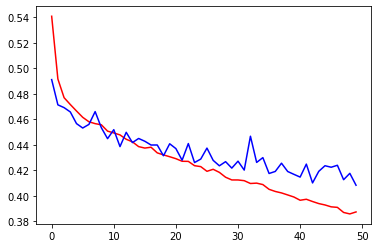

In [ ]:
plt.plot(history.history["loss"],color="red")
plt.plot(history.history["val_loss"],color="blue")